In [27]:
import geopandas as gp
from shapely.geometry import Point, Polygon
import pandas as pd
import sys
sys.path.append('..')

from utils.sa import place_labels
from matplotlib import pyplot as plt

countries_raw = gp.read_file("./tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
urban_raw = gp.read_file('./tmp/ne_10m_urban_areas/ne_10m_urban_areas.shp')
populated_places_raw = gp.read_file('./tmp/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp')
sites_raw = pd.read_csv('./data/eu-nukes-bases.csv')

<Axes: title={'center': 'EU States Hosting US Nuclear Weapons'}>

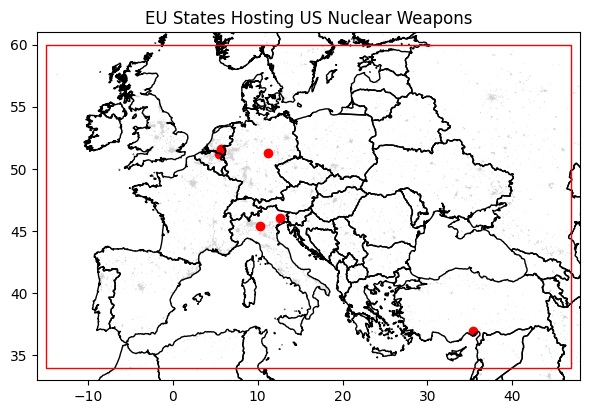

In [28]:
bounding_box = (-15,34,47,60)

countries = countries_raw.set_crs(epsg=4326)
urban = urban_raw.set_crs(epsg=4326)
populated_placed = populated_places_raw.set_crs(epsg=4326)

map_extent = gp.GeoDataFrame(
    data={"geometry": [
        Polygon([
            (bounding_box[0], bounding_box[1]),
            (bounding_box[2], bounding_box[1]),
            (bounding_box[2], bounding_box[3]),
            (bounding_box[0], bounding_box[3]),
		])
	]},
    geometry="geometry",
    crs='EPSG:4326'
)
map_extent.to_file("./tmp/eu-nukes-extent.geojson")

sites = gp.GeoDataFrame(
    data={
        "name": [s["name"] for _, s in sites_raw.iterrows()],
        "geometry": [Point(s["long"], s["lat"]) for _, s in sites_raw.iterrows()]
    },
    geometry="geometry",
    crs="EPSG:4326"
)
sites.to_file("./tmp/eu-nukes-sites.geojson")

# Plot
fig, ax = plt.subplots(figsize=(7,6))
plt.title("EU States Hosting US Nuclear Weapons")

ax.set_xlim(bounding_box[0] -1, bounding_box[2] + 1)
ax.set_ylim(bounding_box[1] -1, bounding_box[3] + 1)

countries.plot(ax=ax, color="none", edgecolor="black", zorder=10)
urban.plot(ax=ax, color="lightgray")
sites.plot(ax=ax, color="red")
map_extent.plot(ax=ax, color='none', edgecolor="red", lw=1, zorder=100)
